<img src="https://github.com/Danteurus/IA/blob/master/source/image.png?raw=true"  width="1100px" height="400px">

# Antes de empezar el proyecto es necesario importar las librerías necesarias para poder empezar con el proyecto, en este caso, se usarán más que todo librerías de SKLearn.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as m
import datetime
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, mean_squared_error, accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn import model_selection
from sklearn.model_selection import KFold, cross_val_score
pd.__version__

'1.0.5'

## Como este proyecto fue realizado en Collaboratory, es pertinente permitir el acceso de Collaboratory a Google Drive.

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Colab Notebooks')
#os.chdir('/content/drive/My Drive/ai-uis-student/talleres20201')
print(os.getcwd())

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks


## Definición de funciones importantes
Es importante definir las funciones que serán usadas más adelante para la continuación del proyecto.

### Tpr y Tnr

In [ ]:
def tpr(est,X,y):
    p = est.predict(X)
    return np.mean (p[y==1] == y[y==1])

def tnr(est,X,y):
    p = est.predict(X)
    return np.mean(p[y==0] == y[y==0])

### Show_curve
Esta función permite visualizar los diferentes errores obtenidos para diferentes números de KFolds. Esto permite encontrar la cantidad de KFolds apropiada para dicho estimador.

In [ ]:
def show_curve(est, X, y):
    means, stds = [], []
    nfolds_range = range(2,50)
    for nfolds in nfolds_range:
        #print (nfolds,)
        s = cross_val_score(est, X, y, cv=KFold(nfolds, shuffle=True), scoring=make_scorer(mean_squared_error))
        means.append(np.mean(s))
        stds.append(np.std(s))

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(nfolds_range, means, label="mean", color="black")
    plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("n folds")
    plt.ylabel("performance")
    plt.legend()

## Dataset que será utilizado para el proyecto.
En este caso, se usará un dataset con los datos de las partidas de jugadores de rango diamante en League of Legends, siendo uno de los rangos más altos dentro del juego y el cual permite tener datos más claros de jugadores profesionales.

In [ ]:
diamond = pd.read_csv("./source/high_diamond_ranked_10min.csv", sep=",")
diamond

gameId  blueWins  ...  redCSPerMin  redGoldPerMin
0     4519157822         0  ...         19.7         1656.7
1     4523371949         0  ...         24.0         1762.0
2     4521474530         0  ...         20.3         1728.5
3     4524384067         0  ...         23.5         1647.8
4     4436033771         0  ...         22.5         1740.4
...          ...       ...  ...          ...            ...
9874  4527873286         1  ...         22.9         1524.6
9875  4527797466         1  ...         20.6         1545.6
9876  4527713716         0  ...         26.1         1831.9
9877  4527628313         0  ...         24.7         1529.8
9878  4523772935         1  ...         20.1         1533.9

[9879 rows x 40 columns]

### Comprobando redundancia.
Para este caso, se usará una matriz de dispersión para comprobar que no exista redundancía entre los datos.

In [ ]:
pd.plotting.scatter_matrix(diamond, figsize=(90,90));

Output hidden; open in https://colab.research.google.com to view.

Si se obseva atentamente, se puede notar que, efectivamente, existe redundancia entre algunas columnas, por lo tando, se eliminarán las columnas que generan redundancia, ya que no son cruciales para este proyecto.

In [ ]:
diamond = diamond.drop(columns=['redGoldPerMin','redCSPerMin','redExperienceDiff','redGoldDiff', 'redDeaths', 'redKills', 'blueGoldPerMin', 'blueCSPerMin'])

In [ ]:
pd.plotting.scatter_matrix(diamond, figsize=(90,90));

Output hidden; open in https://colab.research.google.com to view.

### Trabajando el dataset
Como el dataset ya está listo para empezar a trabajar, se empezará con utilizar un estimador, en este caso se utilizará un DecisionTreeClassifier para empezar a hacer pruebas con nuestro dataset.

In [ ]:
vals = np.random.permutation(diamond.values)
n = int(len(vals)*.8)
X_train = vals[:n,2:]
X_test = vals[n:,2:]
y_train = vals[:n,1]
y_test = vals[n:,1]

X = vals[:,2:]
y = vals[:,1]

est = DecisionTreeClassifier()
est.fit(X_train, y_train)

predictions1 = est.predict(X_train)
predictions2 = est.predict(X_test)

score1 = np.mean(predictions1 == y_train)
score2 = np.mean(predictions2 == y_test)

cm_train = confusion_matrix(y_train, predictions1)
cm_test = confusion_matrix(y_test, predictions2)

print( "matrix de confusión en train\n", cm_train)
print ("matrix de confusión en test\n", cm_test)

print("Puntaje para train: ", score1)
print("Puntaje para test: ", score2)

matrix de confusión en train
 [[3934    0]
 [   0 3969]]
matrix de confusión en test
 [[628 387]
 [343 618]]
Puntaje para train:  1.0
Puntaje para test:  0.6305668016194332


Analizando los resultados obtenidos para Train y para Test, podemos observar un gran OverFitting en nuestro dataset, por lo tanto, hay que empezar a analizar cómo podemos reducir el OverFitting y mejorar el redimiento de nuestro estimador.

#### Análisis de equilibrio
Hay que comprobar que el dataset esté balanceado para las partes de Test y Train, de lo contrario, podríamos obtener malos resultados a causa de esto.

In [ ]:
for i in np.unique(y_test):
    print(i, np.sum(y_test==i))

for i in np.unique(y_train):
    print(i, np.sum(y_train==i))

0.0 1015
1.0 961
0.0 3934
1.0 3969


Como se puede observar, el dataset está muy bien balanceado para las partes de Test y Train, por lo tanto no es necesario intentar balancearlo.

### Análizando el número de Folds
Ya que el estimador está teniendo problemas en su rendimiento, se comprueba si utilizando KFolds podemos disminuir dicho problema.

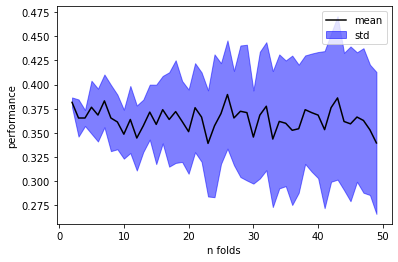

In [ ]:
show_curve(est, X_test, y_test)

Si bien el rendimiento del dataset no incrementa ni disminuye, se puede observar que la desviación estandar aumenta a medida que aumenta el número de Folds, por lo tanto, esta técnica no es rentable para este Dataset en especifico.

### PCA
Las anteriores pruebas con DecisionTreeClassifier no muestran una mejoría considerable con respecto a las primera prueba. Por lo tanto, se usará un tipo de estimador diferente para analizar si se pueden llegar a obtener mejores resultados con este, para este caso, se usará SVC con kernel RBF. Además, se aplicará la técnica de PCA para diferente cantidad de componentes para análizar si es posible obtener mejores resultados.

In [ ]:
n_components = range(2, 32)
means, stds = [], []
for n in n_components:
    print( n,)
    #p = Pipeline((("pca", PCA(n_components=n)), ("classifier", SVC(kernel= 'poly')) ))
    s = cross_val_score(SVC(kernel= 'rbf'), X, y, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
    means.append(np.mean(s))
    stds.append(np.std(s))
means = np.r_[means]
stds  = np.r_[stds]

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

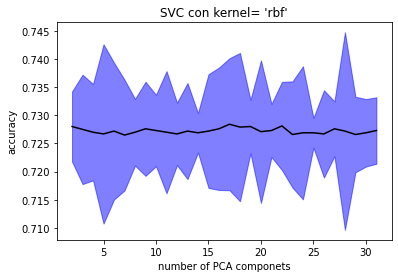

In [ ]:
plt.plot(n_components, means, color="black")
plt.fill_between(n_components, means-stds, means+stds, color="blue", alpha=.5)
plt.xlabel("number of PCA componets")
plt.ylabel("accuracy")
plt.title("SVC con kernel= 'rbf'")
plt

Como se puede observar, las pruebas usando un estimador diferente fueron mejores que las obtenidas anteriormente. Sin embargo, analizando la cantidad de componentes usados en PCA no parece afectar significativamente el rendimiento.

### DecisionTreeClassifier con diferentes profundidades
Se toma la decisión de utilizar nuevamente DecisionTreeClassifier pero esta vez utilizando diferentes profundidades para analizar si es posible obtener porcentajes mayores a los obtenidos anteriormente.

In [ ]:
vals = np.random.permutation(diamond.values)
n = int(len(vals)*.8)
X_train = vals[:n,2:]
X_test = vals[n:,2:]
y_train = vals[:n,1]
y_test = vals[n:,1]

X = vals[:,2:]
y = vals[:,1]

depth = range(2, 32)
means, stds = [], []

for i in depth:
    est = DecisionTreeClassifier(max_depth=i, criterion='entropy')
    s = cross_val_score(est, X, y, cv=KFold(2, shuffle=True), scoring=make_scorer(accuracy_score))
    means.append(np.mean(s))
    stds.append(np.std(s))
means = np.r_[means]
stds  = np.r_[stds]

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

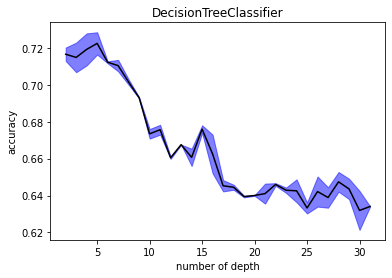

In [ ]:
plt.plot(depth, means, color="black")
plt.fill_between(depth, means-stds, means+stds, color="blue", alpha=.5)
plt.xlabel("number of depth")
plt.ylabel("accuracy")
plt.title("DecisionTreeClassifier")
plt

Por la gráfica podemos concluir que a mayor profundidad, peor será el rendimiento del DecisionTreeClassifier. Sin embargo, se puede apreciar que el estimador trabaja muy bien cuando se trata de una profundidad de 4, por lo tanto, decidimos escoger esa profundidad y hacer más pruebas.

Ahora, se procederá a variar la cantidad de mínima de muestras con del DecisionTreeClassifier.

In [ ]:
min_samples_split = range(2, 32)
means, stds = [], []

for i in min_samples_split:
    est = DecisionTreeClassifier(max_depth=4, min_samples_split=i, criterion='entropy')
    s = cross_val_score(est, X, y, cv=KFold(2, shuffle=True), scoring=make_scorer(accuracy_score))
    means.append(np.mean(s))
    stds.append(np.std(s))
means = np.r_[means]
stds  = np.r_[stds]

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

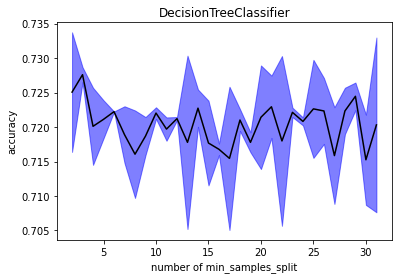

In [ ]:
plt.plot(min_samples_split, means, color="black")
plt.fill_between(min_samples_split, means-stds, means+stds, color="blue", alpha=.5)
plt.xlabel("number of min_samples_split")
plt.ylabel("accuracy")
plt.title("DecisionTreeClassifier")
plt

En este caso, no es tan claro cuantas muestras minimas trabajan bien en este Dataset, pero se encontró que la cantidad de 29 muestras suele trabajar acordemente, por lo tanto, para proseguir con más pruebas, se escogerá dicha cantidad de muestras.

Ahroa se procederá cambiar la cantidad de hojas que se utilizará el estimador.

In [ ]:
min_samples_leaf = range(2, 32)
means, stds = [], []

for i in min_samples_split:
    est = DecisionTreeClassifier(max_depth=4, min_samples_split=29, criterion='entropy', min_samples_leaf = i)
    s = cross_val_score(est, X, y, cv=KFold(2, shuffle=True), scoring=make_scorer(accuracy_score))
    means.append(np.mean(s))
    stds.append(np.std(s))
means = np.r_[means]
stds  = np.r_[stds]

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

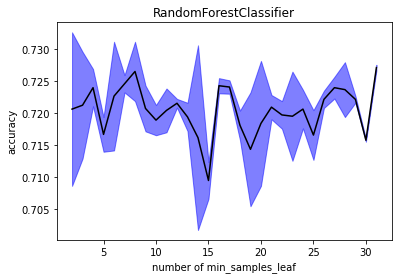

In [ ]:
plt.plot(min_samples_leaf, means, color="black")
plt.fill_between(min_samples_leaf, means-stds, means+stds, color="blue", alpha=.5)
plt.xlabel("number of min_samples_leaf")
plt.ylabel("accuracy")
plt.title("DecisionTreeClassifier")
plt

A simple vista, no se ha podido encontrar una cantidad de hojas que sea ideal para este problema, sin mencionar que el porcentaje está variando una cantidad considerable entre cada cantidad de hojas, por lo tanto, es poco posible que se puede obtener un mejor porcentaje a partir de este tipo de estimador.

### Aplicando un estimador nuevo: MultinomialNB
Habiendo probado ya el estimador SVC con kernel 'rbf' y el DecisionTreeClasifier, se ha decidido intentar aplicar un nuevo estimador, el cual no está dentro del plan de la asignatura de Inteligencia Artificial I, pero que fue sugerida por el profesor Gustavo Garzón. Dicho estimador es MultinomialNB, al cual se le harán diferentes pruebas para determinar si es posible obtener un porcentaje prometedor.

Es importante notar que no es posible usar MultinomialNB con valores negativos en un dataset, por lo tanto, hay que transformar todos los datos del dataset en valores positivos; para ello, se sumará el valor absoluto del menor valor a cada uno de los datos del dataset, para así evitar errores a la hora de entrenar. 

In [ ]:
vals = np.random.permutation(diamond.values)

print(vals.min())

vals = vals + abs(vals.min())

X = vals[:,2:]
y = vals[:,1]

n = int(len(vals)*.8)
X_train = vals[:n,2:]
X_test = vals[n:,2:]
y_train = vals[:n,1]
y_test = vals[n:,1]

est = MultinomialNB()
est.fit(X_train,y_train)

depth = range(1, 100)
means, stds = [], []

for i in depth:
    s = cross_val_score(MultinomialNB(alpha = i), X, y, cv=KFold(2, shuffle=True), scoring=make_scorer(accuracy_score))
    means.append(np.mean(s))
    stds.append(np.std(s))
means = np.r_[means]
stds  = np.r_[stds]

predictions1 = est.predict(X_test)
predictions2 = est.predict(X_train)
    
score1 = np.mean(predictions2 == y_train)
score2 = np.mean(predictions1 == y_test)
print(score1)
print(score2)

-11467.0
0.7299759584967733
0.7186234817813765


A diferencia de los estimadores utilizados anteriormente, MultinomialNB con los valores default ya arroja un porcentaje mejor que los demás estimadores con sus parametros por default, sin mencionar que el tiempo de ejecución es mucho menor, por lo tanto, se trabajará más a fondo con este estimador.

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

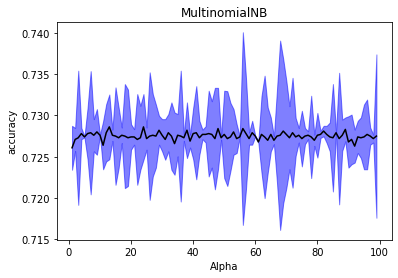

In [ ]:
plt.plot(depth, means, color="black")
plt.fill_between(depth, means-stds, means+stds, color="blue", alpha=.5)
plt.xlabel("Alpha")
plt.ylabel("accuracy")
plt.title("MultinomialNB")
plt

MultinomialNB tiene un parámetro Alpha que puede ir variando en diferentes valores, así que se decidió hacer una prueba para comprobar para qué valor de Alpha trabaja mejor. Como se puede observar en la gráfica de arriba, no hay realmente un valor en específico en el cual el estimador tenga un mejor resultado.

matrix de confusión en train
 [[2815 1113]
 [1054 2921]]
matrix de confusión en test
 [[752 269]
 [261 694]]
Confusion matrix, without normalization
[[752 269]
 [261 694]]
Normalized confusion matrix
[[0.73653281 0.26346719]
 [0.27329843 0.72670157]]


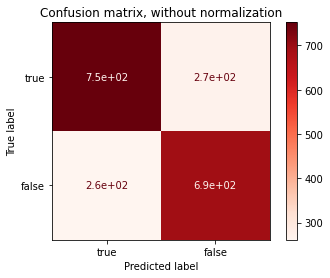

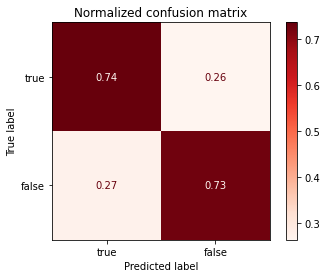

In [ ]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

class_names = ["true", "false"]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(est, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Reds,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Para terminar, se decidió hacer una matriz de confusión para el estimador MultinomialNB. Con toda la información recolectada hasta el momento se puede determinar que la naturaleza del problema es ligeramente aleatoria, lo cual complica la predicción del fenómeno, pero de todas formas, aplicando diferentes métodos y técnicas, es posible mejorar la capacidad del estimador. En este caso, este último estimador se equivocaría 1 de cada 4 partidas.